In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('ev_geographic_segmentation.csv')

In [ ]:
df.shape

(1000, 4)

In [ ]:
df.head()

,Region,Preferred EV Type,Income Level,EV Adoption Likelihood (%)
0,West India,EV Hatchback,High Income,44
1,Central India,EV Hatchback,Low Income,44
2,South India,EV SUV,Low Income,49
3,South India,EV SUV,High Income,44
4,West India,EV Scooter,Low Income,44


In [ ]:
df.columns

Index(['Region', 'Preferred EV Type', 'Income Level',
       'EV Adoption Likelihood (%)'],
      dtype='object')

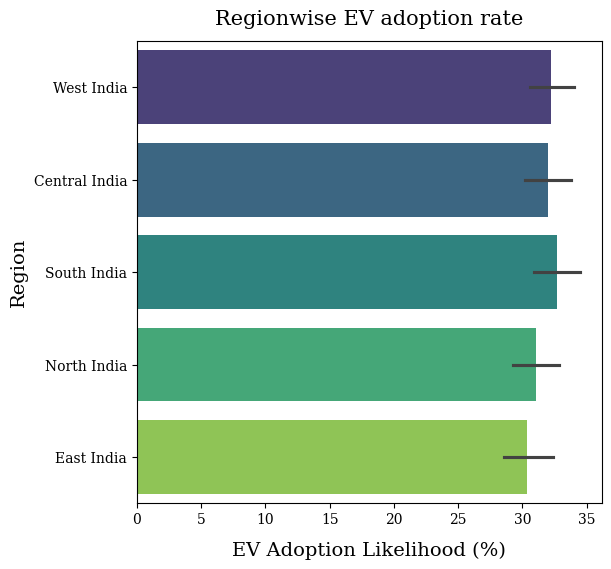

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y=df['Region'].sort_values(ascending=True), x='EV Adoption Likelihood (%)', palette='viridis')
plt.ylabel('Region', fontsize=14, family='serif')
plt.xlabel('EV Adoption Likelihood (%)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Regionwise EV adoption rate', weight=200, family='serif', size=15, pad=12)
plt.show()

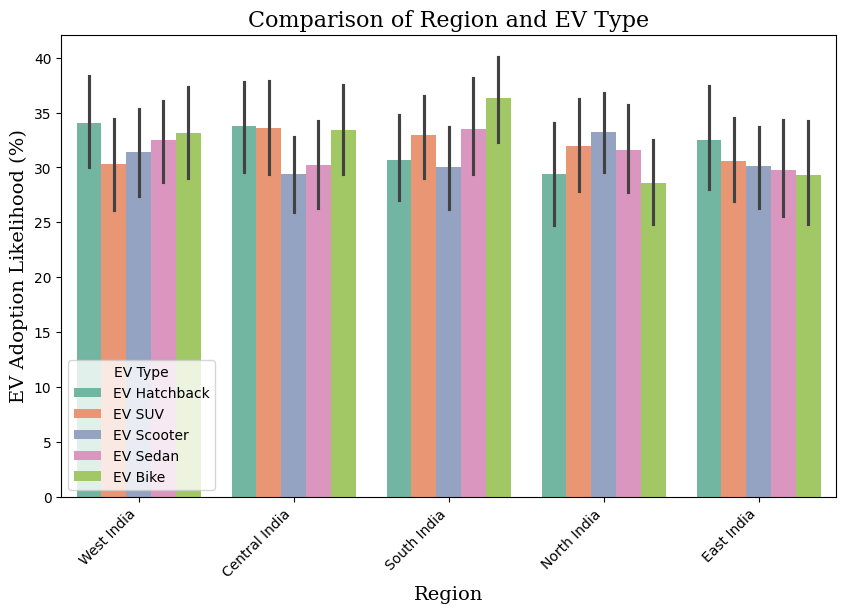

In [ ]:


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='EV Adoption Likelihood (%)', hue='Preferred EV Type', palette='Set2')
plt.xlabel('Region', fontsize=14, family='serif')
plt.ylabel('EV Adoption Likelihood (%)', fontsize=14, family='serif')
plt.title('Comparison of Region and EV Type', fontsize=16, family='serif')
plt.xticks(rotation=45, ha='right')
plt.legend(title='EV Type')
plt.show()


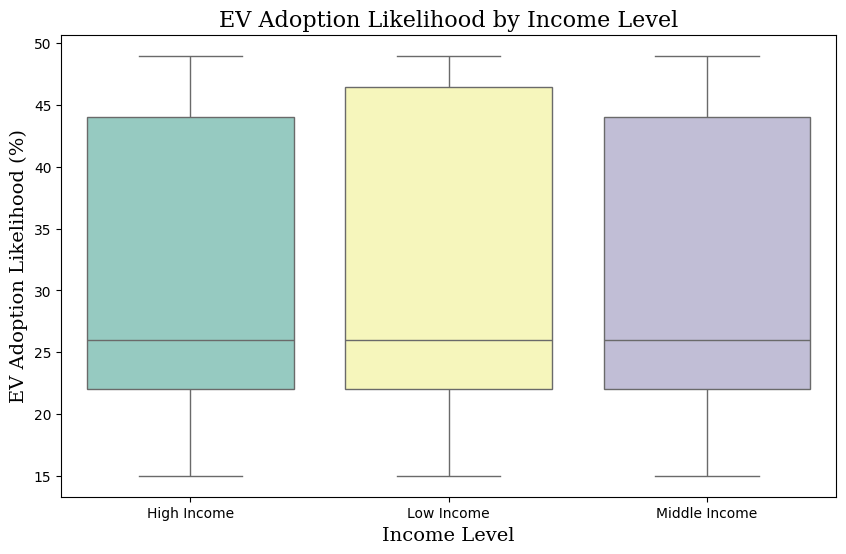

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Income Level', y='EV Adoption Likelihood (%)', palette='Set3')
plt.xlabel('Income Level', fontsize=14, family='serif')
plt.ylabel('EV Adoption Likelihood (%)', fontsize=14, family='serif')
plt.title('EV Adoption Likelihood by Income Level', fontsize=16, family='serif')
plt.show()


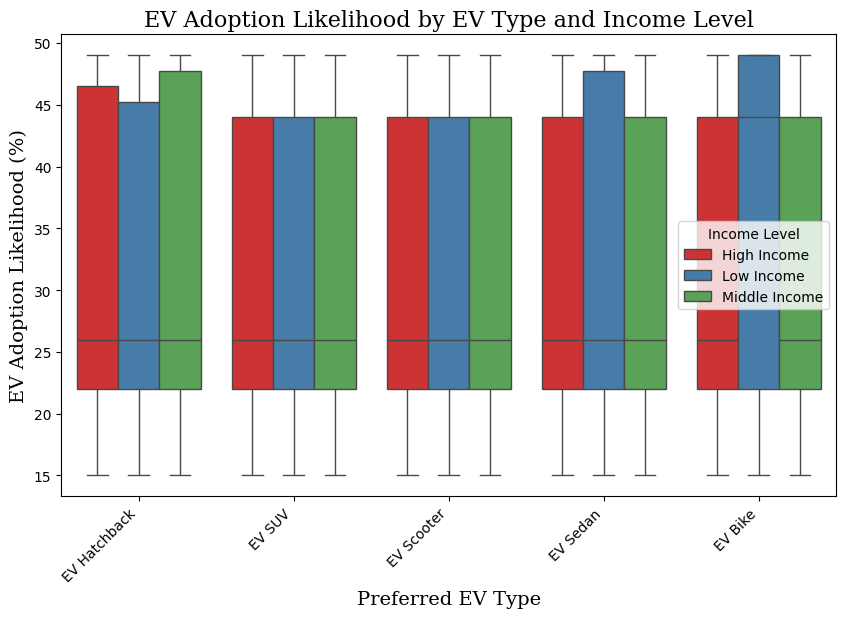

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Preferred EV Type', y='EV Adoption Likelihood (%)', hue='Income Level', palette='Set1')
plt.xlabel('Preferred EV Type', fontsize=14, family='serif')
plt.ylabel('EV Adoption Likelihood (%)', fontsize=14, family='serif')
plt.title('EV Adoption Likelihood by EV Type and Income Level', fontsize=16, family='serif')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Level')
plt.show()


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Region', 'Preferred EV Type', 'Income Level'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()


for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df

,Region,Preferred EV Type,Income Level,EV Adoption Likelihood (%)
0,4,1,0,44
1,0,1,1,44
2,3,2,1,49
3,3,2,0,44
4,4,3,1,44
...,...,...,...,...
995,0,4,0,26
996,2,3,1,22
997,1,0,2,44
998,2,1,1,49


In [ ]:
df.corr()

,Region,Preferred EV Type,Income Level,EV Adoption Likelihood (%)
Region,1.000000,-0.015789,0.033150,0.029300
Preferred EV Type,-0.015789,1.000000,0.032085,-0.033715
Income Level,0.033150,0.032085,1.000000,-0.046901
EV Adoption Likelihood (%),0.029300,-0.033715,-0.046901,1.000000


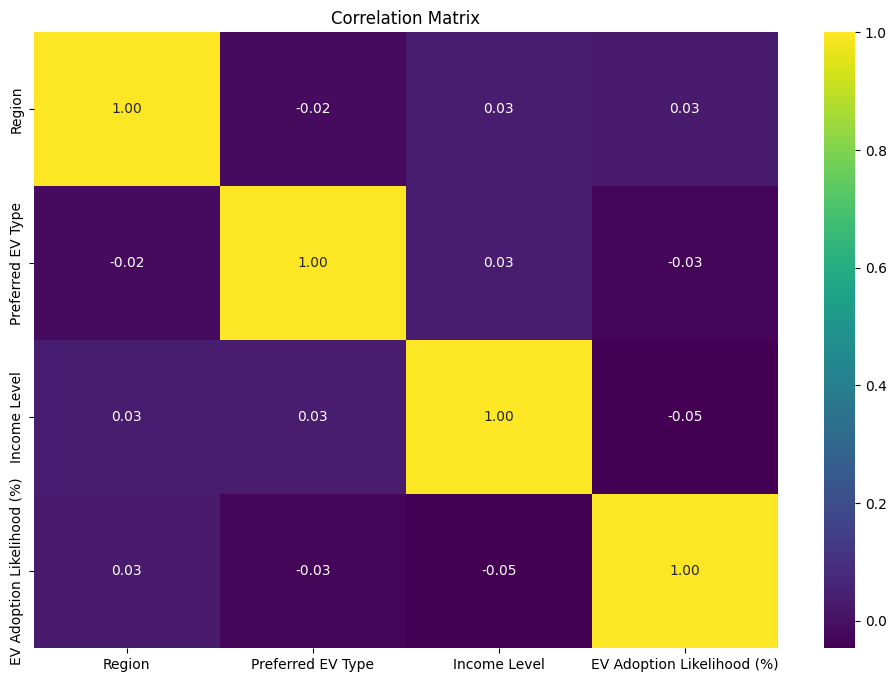

In [ ]:


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)


In [ ]:
X = df[['Income Level', 'EV Adoption Likelihood (%)']]

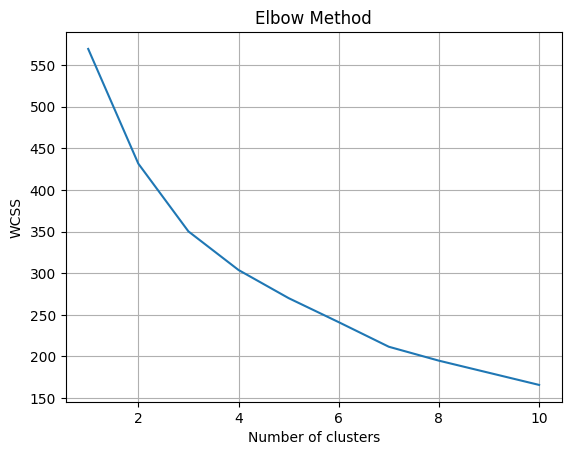

In [ ]:
# prompt: perform elbow method

from sklearn.cluster import KMeans

# Initialize the list to store WCSS values for different k values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

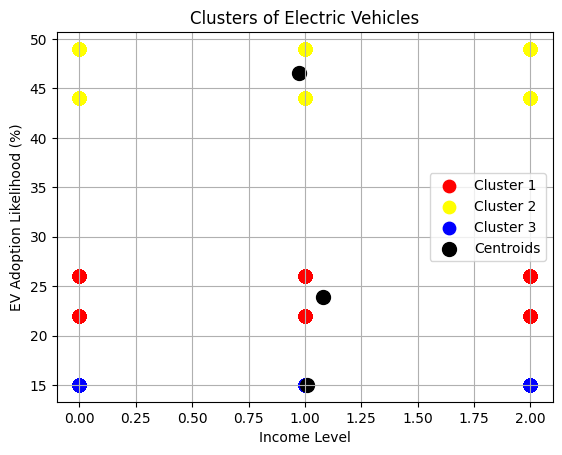

In [ ]:
m = np.array(X)
plt.scatter(m[clusters == 0, 0], m[clusters == 0, 1], s=80, c='red', label='Cluster 1')
plt.scatter(m[clusters == 1, 0], m[clusters == 1, 1], s=80, c='yellow', label='Cluster 2')
plt.scatter(m[clusters == 2, 0], m[clusters == 2, 1], s=80, c='blue', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.title('Clusters of Electric Vehicles')
plt.xlabel('Income Level')
plt.ylabel('EV Adoption Likelihood (%)')
plt.legend()
plt.grid(True)
plt.show()